<center>
UNIVERSIDADE DO ESTADO DO AMAZONAS<br><br>
ANDREY GABRIEL DOS ANJOS MENDES<br>
BEATRIZ GUEDES DA SILVA<br>
EMANUELLE ROCHA MARREIRA<br>
ÍTALO FERREIRA FONSECA<br>
JOÃO VITOR SILVA DE CARVALHO
<BR><BR>
TRABALHO PRÁTICO: ALGORITMOS DE BUSCA<br><br>
PROFESSOR: TIAGO EUGENIO DE MELO
</center>

# Busca com heurística

Uma heurística é uma técnica utilizada para resolver problemas que, embora não garanta uma solução ótima ou perfeita, oferece uma solução suficientemente boa de forma eficiente. Essas técnicas são baseadas em experiências passadas e intuições, permitindo decisões rápidas e práticas em situações complexas ou de informações incompletas.

Heurísticas são comumente usadas em áreas como ciência da computação, inteligência artificial e psicologia cognitiva. Elas servem para simplificar a resolução de problemas complexos ao reduzir o número de opções possíveis a serem consideradas.

Por exemplo, em algoritmos de busca, uma heurística pode guiar o processo de busca em direção ao objetivo esperado, agilizando a solução.

Para este trabalho, faremos uma heurística que consiste em priorizar a busca por pessoa que contém mais filmes feitos. Por exemplo, um ator que fez 10 filmes terá mais prioridade de busca do que um ator que fez apenas 5.

Escolhemos essa estratégia como forma de direcionar uma busca gulosa, de forma que o tempo de execução do algoritmo seja reduzido, já que um ator que possui mais conexões possui mais chances de ter contracenado com o ator procurado.




# Implementação dos Algoritmos de Busca

## Busca Bidirecional

A busca bidirecional é uma estratégia de busca que, em vez de buscar do estado inicial ao objetivo, realiza duas buscas simultâneas: uma partindo do estado inicial (forward) e outra do estado objetivo (backward). O objetivo é que ambas as buscas se encontrem em algum ponto intermediário do espaço de busca, reduzindo significativamente o tempo necessário para encontrar a solução.

A busca bidirecional pode ser muito eficiente em termos de tempo de execução, especialmente em problemas onde o fator de ramificação $(b)$ é alto em ambas as direções

Como a busca ocorre em duas direções, o espaço de busca total explorado é consideravelmente menor do que na busca unidirecional. Isso significa que menos nós precisam ser expandidos e avaliados, contribuindo para a eficiência do algoritmo.

### Exemplo com um grafo menor e fictício

In [ ]:
# Importação de Bibliotecas
import networkx as nx
import ast
import pandas as pd
import io
from google.colab import files

In [ ]:
# Faz upload do arquivo CSV e armazena o nome do primeiro arquivo carregado
file = files.upload()
filename = list(file.keys())[0]

# Lê o arquivo CSV carregado em um DataFrame
data = pd.read_csv(io.BytesIO(file[filename]))

data.head(5)


Saving data.csv to data (6).csv


,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Kevin Bacon', 'Edie Mirman', '...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['William Sadler', 'Arun Govil', 'Al Pacino', ...","['Lazy,', 'uneducated', 'students', 'share', '..."


In [ ]:
# Cria um grafo não-direcionado
G = nx.Graph()

# Itera pelas linhas do DataFrame 'data'
for index, row in data.iterrows():
    # Converte a string da coluna 'Stars' para uma lista de atores usando ast.literal_eval
    actors = ast.literal_eval(row['Stars'])

    # Adiciona os atores como nós ao grafo
    G.add_nodes_from(actors)

    # Cria arestas entre todos os pares de atores
    for i, actor in enumerate(actors):
        for j in range(i + 1, len(actors)):
            G.add_edge(actor, actors[j])

# Obtém o número de nós e arestas do grafo
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Exibe o número de nós e arestas
print(f"nós: {num_nodes}")
print(f"arestas: {num_edges}")


nós: 12
arestas: 23


In [ ]:
# Cria um conjunto vazio para armazenar atores distintos
actors_distinct = set()

# Itera pelas linhas do DataFrame 'data'
for index, row in data.iterrows():
    # Converte a string da coluna 'Stars' em uma lista de atores
    actors = ast.literal_eval(row['Stars'])

    # Adiciona os atores ao conjunto (garante que sejam únicos)
    actors_distinct.update(actors)

# Exibe o conjunto de atores distintos
actors_distinct


{'Al Pacino',
 'Arun Govil',
 'Bob Gunton',
 'Diane Keaton',
 'Edie Mirman',
 'James Caan',
 'Kevin Bacon',
 'Marlon Brando',
 'Morgan Freeman',
 'Rael Padamsee',
 'Tim Robbins',
 'William Sadler'}

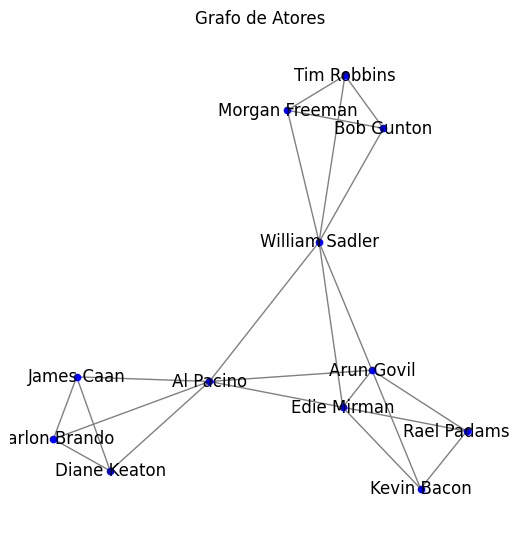

In [ ]:
# Plotando o grafo
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, with_labels=True, node_size=20, edge_color="gray", node_color="blue")

plt.title("Grafo de Atores")
plt.show()


In [ ]:
from collections import deque
import time

### bidirectional_search

 Executa a busca bidirecional simultânea de dois nós (um a partir da fonte e outro a partir do alvo) utilizando BFS, expandindo as buscas até que os caminhos se encontrem.

 O código utilizado foi baseado no algoritmo de BFS do livro Introduction to Algorithms.

In [ ]:
def bidirectional_search(graph, source, target):
    start_time = time.time()
    # Verificação de casos base
    if source == target: # Ator de origem = Ator de destino
        return None, None, None, time.time() - start_time
    if source not in graph or target not in graph: # Se ator de origem ou ator de destino não existem no grafo
        return None, None, None, time.time() - start_time

    # Dicionários para rastrear nós descobertos e pais
    discovered_forward = {}
    discovered_backward = {}
    parent_forward = {}
    parent_backward = {}

    if target in graph[source]: # Se ator de destino é vizinho do ator de origem
        parent_forward.setdefault(source, target)
        parent_backward.setdefault(target, source)
        return source, parent_forward, parent_backward, time.time() - start_time

    # Filas para armazenar e gerenciar os nós que estão sendo explorados durante a busca
    q_forward, q_backward = deque(), deque()

    # Inicializa as estruturas de discovered de source e de target como 1, o que no livro seria definido como "cinza",
    # ou seja, foram nós descobertos, porém não completamente explorados
    discovered_forward[source], discovered_backward[target] = 1, 1

    # Filas de busca inicialmente possuem tanto source e target
    q_forward.append(source)
    q_backward.append(target)

    while q_forward and q_backward: # A buca dura enquanto as filas não estão vazias

        # Expandir a busca para frente
        v = q_forward.popleft()
        for u in graph[v]: # Para cada adjacente de v
            if discovered_forward.setdefault(u, 0) == 0: # Se o nó não foi descoberto
                discovered_forward[u] = 1 # Marca o nó como "a explorar"
                parent_forward.setdefault(u, v)  # Guarda o pai do nó
                q_forward.append(u) # Adiciona nó na fila
                if u in q_backward: # verifica interseção
                    return u, parent_forward, parent_backward, time.time() - start_time
        discovered_forward[v] = 2 # v foi totalmente explorado

        # Expandir a busca para trás
        s = q_backward.popleft()
        for w in graph[s]:
            if discovered_backward.setdefault(w, 0) == 0:
                discovered_backward[w] = 1
                parent_backward.setdefault(w, s)
                q_backward.append(w)
                if w in q_forward:
                    return w, parent_forward, parent_backward, time.time() - start_time
        discovered_backward[s] = 2


    return None, parent_forward, parent_backward, time.time() - start_time

### Funções para impressão do caminho

In [ ]:
def reconstruct_path(node_in_common, parent_forward, parent_backward):
    # Garante que o caminho de source até target esteja correto
    path = []

    # Caminho da busca para frente
    forward_node = node_in_common

    while forward_node is not None and forward_node in parent_forward and parent_forward[forward_node] is not None:
        path.append(forward_node)
        forward_node = parent_forward[forward_node]
    if forward_node is not None:
        path.append(forward_node)
    path.reverse()

    # Caminho da busca para trás
    backward_node = node_in_common
    while backward_node is not None and backward_node in parent_backward and parent_backward[backward_node] is not None:
        backward_node = parent_backward[backward_node]
        path.append(backward_node)

    return path


def format_path(path):
    return " -> ".join(path)

def print_final_result(path, exec_time):
    formatted_path = format_path(path)
    bacon_number = len(path) - 1
    print(f"Caminho encontrado: {formatted_path}")
    print(f"Número de Bacon: {bacon_number}")
    print(f"Tempo de execução: {exec_time:8f} segundos")
    return bacon_number

### Função principal para realizar a busca

In [ ]:
def find_bacon_number(graph, source, target):
    node_in_common, parent_forward, parent_backward, exec_time = bidirectional_search(graph, source, target)
    if node_in_common and parent_forward and parent_backward:
        path = reconstruct_path(node_in_common, parent_forward, parent_backward)
        return print_final_result(path, exec_time)
    else:
        print("Caminho não encontrado")
        return None

### Testes

In [ ]:
find_bacon_number(G, 'Kevin Bacon', 'Kevin Bacon') # iguais
print()
find_bacon_number(G, 'Kevin Bacon', 'Leonardo DiCapri') # nó que não existe
print()
find_bacon_number(G, 'Edie Mirman', 'Kevin Bacon') # vizinho
print()
find_bacon_number(G, 'Kevin Bacon', 'William Sadler') # Bacon number = 2
print()
find_bacon_number(G, 'Kevin Bacon', 'Morgan Freeman') # Bacon number = 3

Caminho não encontrado

Caminho não encontrado

Caminho encontrado: Kevin Bacon -> Edie Mirman
Número de Bacon: 1
Tempo de execução: 0.000021 segundos

Caminho encontrado: Kevin Bacon -> Arun Govil -> William Sadler
Número de Bacon: 2
Tempo de execução: 0.000027 segundos

Caminho encontrado: Kevin Bacon -> Arun Govil -> William Sadler -> Morgan Freeman
Número de Bacon: 3
Tempo de execução: 0.000032 segundos


3

### Grafo do Projeto Prático

In [ ]:
file = files.upload()
filename = list(file.keys())[0]
data = pd.read_csv(io.BytesIO(file[filename]))

Saving data.csv to data (7).csv


In [ ]:
G = nx.Graph()

for index, row in data.iterrows():
    actors = ast.literal_eval(row['Stars'])

    G.add_nodes_from(actors)

    for i, actor in enumerate(actors):
        for j in range(i + 1, len(actors)):
            G.add_edge(actor, actors[j])

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"nós: {num_nodes}")
print(f"arestas: {num_edges}")

nós: 15350
arestas: 57140


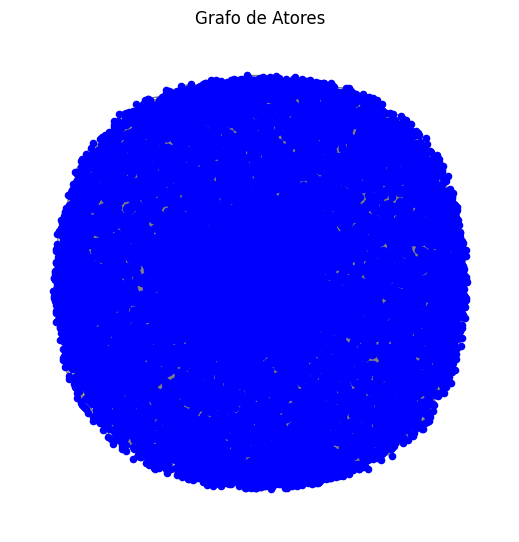

In [ ]:
plt.figure(figsize=(5, 5))

pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, with_labels=False, node_size=20, edge_color="gray", node_color="blue")

plt.title("Grafo de Atores")
plt.show()

In [ ]:
find_bacon_number(G, 'Tom Hanks', 'Kevin Bacon')
print()
find_bacon_number(G, 'Leonardo DiCaprio', 'Kevin Bacon')
print()
find_bacon_number(G, 'Joaquin Phoenix', 'Kevin Bacon')
print()
find_bacon_number(G, 'Jennifer Aniston', 'Kevin Bacon')
print()
find_bacon_number(G, 'Keanu Reeves', 'Kevin Bacon')
print()
find_bacon_number(G, 'Meryl Streep', 'Kevin Bacon')
print()
find_bacon_number(G, 'Brad Pitt', 'Kevin Bacon')
print()
find_bacon_number(G, 'Akshay Kumar', 'Kevin Bacon')
print()


Caminho encontrado: Kevin Bacon -> Tom Hanks
Número de Bacon: 1
Tempo de execução: 0.000039 segundos

Caminho encontrado: Leonardo DiCaprio -> Jack Nicholson -> Kevin Bacon
Número de Bacon: 2
Tempo de execução: 0.000108 segundos

Caminho encontrado: Joaquin Phoenix -> Robert De Niro -> Kevin Bacon
Número de Bacon: 2
Tempo de execução: 0.000147 segundos

Caminho encontrado: Kevin Bacon -> Jennifer Aniston
Número de Bacon: 1
Tempo de execução: 0.000017 segundos

Caminho encontrado: Keanu Reeves -> Jack Nicholson -> Kevin Bacon
Número de Bacon: 2
Tempo de execução: 0.000169 segundos

Caminho encontrado: Kevin Bacon -> Meryl Streep
Número de Bacon: 1
Tempo de execução: 0.000009 segundos

Caminho encontrado: Kevin Bacon -> Brad Pitt
Número de Bacon: 1
Tempo de execução: 0.000007 segundos

Caminho encontrado: Akshay Kumar -> Om Puri -> Tim Robbins -> Kevin Bacon
Número de Bacon: 3
Tempo de execução: 0.001273 segundos



## Busca Heurística

Aqui organizando o grafo utilizado na busca heurística, adicionando o grau de cada vertice pois isso será utilizado na busca.

In [ ]:
import networkx as nx
import ast

In [ ]:
G = nx.Graph()

contagem_atores = {}
for index, row in data.iterrows():
    actors = ast.literal_eval(row['Stars'])
    for actor in actors:
        if actor in contagem_atores:
            contagem_atores[actor] += 1
        else:
            contagem_atores[actor] = 1


for index, row in data.iterrows():
    actors = ast.literal_eval(row['Stars'])

    G.add_nodes_from(actors)

    for i, actor in enumerate(actors):
        for j in range(i + 1, len(actors)):
            G.add_edge(actor, actors[j])

for actor, quantidade in contagem_atores.items():
    G.nodes[actor]['filmes'] = quantidade

In [ ]:
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, k=0.15)

nx.draw(G, pos, with_labels=False, node_size=20, edge_color="gray", node_color="blue")

plt.title("Grafo de Atores")
plt.show()

<Figure size 500x500 with 0 Axes>

In [ ]:
# Exibir informações do grafo
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Nós: {num_nodes}")
print(f"Arestas: {num_edges}")


Nós: 15350
Arestas: 57140


O caminho heuristico aqui se baseia em procurar sempre pelas pessoas com mais conexões (filmes) para fazer o caminho.

In [ ]:
def buscar_caminho_heuristico(grafo, inicio, destino):
    start_time = time.time()
    if inicio not in grafo or destino not in grafo:
        print(f"{inicio} ou {destino} não estão no grafo.")
        exec_time = time.time() - start_time
        print(f"Tempo de execução: {exec_time:.4f} segundos")
        return 0

    visitados = set()
    fila = [(grafo.degree(inicio), inicio, [inicio])]  #  (grau, nó atual, caminho atual)

    while fila:
        # Ordena a fila por grau
        fila.sort(reverse=True, key=lambda x: x[0])
        a, atual, caminho = fila.pop(0)

        if destino in grafo.neighbors(atual):
            print("Caminho encontrado:", " -> ".join(caminho + [destino]))
            print(f"Número de Bacon: {len(caminho + [destino])-1}")
            exec_time = time.time() - start_time
            print(f"Tempo de execução: {exec_time:.4f} segundos")
            return
        if atual in visitados:
            continue
        visitados.add(atual)

        for vizinho in grafo.neighbors(atual):
            if vizinho not in visitados:
                fila.append((grafo.degree(vizinho), vizinho, caminho + [vizinho]))

    print(f"Sem caminho entre {inicio} e {destino}.")
    exec_time = time.time() - start_time
    print(f"Tempo de execução: {exec_time:.4f} segundos")
    return None

Pode-se notar por exemplo que Keanu Reeves e Kevin Bacon muda o valor de Bacon entre os algoritmos.

Isso se deve pelo fato de que entre eles existem pessoas com mais conexões mas não necessariamente levam ao menor caminho.

In [ ]:
buscar_caminho_heuristico(G, 'Tom Hanks', 'Kevin Bacon')
print()
buscar_caminho_heuristico(G, 'Leonardo DiCaprio', 'Kevin Bacon')
print()
buscar_caminho_heuristico(G, 'Joaquin Phoenix', 'Kevin Bacon')
print()
buscar_caminho_heuristico(G, 'Jennifer Aniston', 'Kevin Bacon')
print()
buscar_caminho_heuristico(G, 'Keanu Reeves', 'Kevin Bacon')
print()
buscar_caminho_heuristico(G, 'Meryl Streep', 'Kevin Bacon')
print()
buscar_caminho_heuristico(G, 'Brad Pitt', 'Kevin Bacon')
print()
buscar_caminho_heuristico(G, 'Akshay Kumar', 'Kevin Bacon')
print()

Caminho encontrado: Tom Hanks -> Kevin Bacon
Número de Bacon: 1
Tempo de execução: 0.0027 segundos

Caminho encontrado: Leonardo DiCaprio -> Robert De Niro -> Kevin Bacon
Número de Bacon: 2
Tempo de execução: 0.0003 segundos

Caminho encontrado: Joaquin Phoenix -> Robert De Niro -> Kevin Bacon
Número de Bacon: 2
Tempo de execução: 0.0070 segundos

Caminho encontrado: Jennifer Aniston -> Kevin Bacon
Número de Bacon: 1
Tempo de execução: 0.0001 segundos

Caminho encontrado: Keanu Reeves -> Morgan Freeman -> Robert De Niro -> Kevin Bacon
Número de Bacon: 3
Tempo de execução: 0.0008 segundos

Caminho encontrado: Meryl Streep -> Kevin Bacon
Número de Bacon: 1
Tempo de execução: 0.0001 segundos

Caminho encontrado: Brad Pitt -> Kevin Bacon
Número de Bacon: 1
Tempo de execução: 0.0001 segundos

Caminho encontrado: Akshay Kumar -> Amitabh Bachchan -> Irrfan Khan -> Tom Hanks -> Kevin Bacon
Número de Bacon: 4
Tempo de execução: 0.0248 segundos



#  Avaliação e Resultados

## Tempo de Execução
A busca bidirecional demorou menos tempo para achar os atores procurados do que a heurística proposta pelo grupo. Isso era esperado, já que busca bidirecional é geralmente mais rápida que a busca gulosa com fila de prioridade, porque explora o grafo simultaneamente a partir do estado inicial e do estado final, reduzindo significativamente o número total de nós explorados. Enquanto a busca gulosa toma decisões baseadas em uma heurística local, o que pode levar a explorar caminhos menos eficientes, a busca bidirecional divide o problema em duas partes e encontra o ponto de interseção mais rapidamente.

## Precisão
Além do pior tempo de excução, a heurística teve uma precisão menor que a busca bidirecional, por exemplo, o ator Akshay Kumar tem um número de Bacon 4 na heurística de melhoria da busca gulosa, já o número de Bacon do mesmo ator é 3 na busca bidirecional. Isso se deve ao fato de que a busca bidirecional explora simultaneamente os caminhos a partir do ponto de origem e do ponto de destino, garantindo uma exploração mais completa e balanceada do grafo. Ao fazer isso, ela minimiza a chance de ignorar conexões importantes ou mais curtas entre os nós, algo que a busca gulosa, mesmo com heurística, pode não fazer.

# Análise de Complexidade


## Complexidade de Tempo

* Busca Bidirecional

A busca bidirecional apresenta uma complexidade de tempo de $O(b^{\frac{d}{2}})$, onde 'b' é o fator de ramificação e 'd' é a profundidade da solução. Essa complexidade representa uma melhoria significativa em relação à busca unidirecional, que possui complexidade de $O(b^d)$. A busca em ambas as direções reduz consideravelmente o número de nós explorados, resultando em um tempo de execução menor

* Busca Heurística

O tempo de busca do algoritmo feito pelo grupo tem um tempo menor em relação aos algoritmos de busca mais conhecidos (que geralmente tem complexidade $O(b^d)$), pois seguimos um caminho pré definido, no caso, priorizar o ator com mais filmes feitos (quando não achamos o ator procurado). A operação de sort tem a complexidade $O(n log n)$, onde n é o número de elementos na fila. Como o sort é feito em cada iteração do while, o custo é multiplicado pelo número de nós, resultando em $O(v^2 log v)$, no pior caso, com v sendo o número de vértices do grafo. Apesar disso, a busca heurística ainda possui um tempo pior que a busca bidirecional.


## Complexidade de Espaço

* Busca Bidirecional

A busca bidirecional apresenta uma complexidade de espaço de $O(b^{\frac{d}{2}})$. Para garantir o encontro das buscas, os nós de pelo menos uma das frentes de busca devem ser armazenados em memória, similar à busca em largura. Em problemas com alto fator de ramificação, essa necessidade de armazenamento pode ser um fator limitante.

* Busca Heurística

Apesar da diminuição do tempo da busca heurística, o espaço que ele ocupa ainda é $O(b^d)$, pois as arestas possíveis de serem traçadas não são eliminadas, elas só entram em uma fila de prioridade para saber qual vai ser navegada primeiro.

# Conclusões

Os algoritmos de busca são fundamentais em diversas áreas da ciência da computação e na vida cotidiana, pois permitem que sistemas encontrem informações de forma eficiente e organizada.

A busca bidirecional, em particular, destaca-se por sua eficiência, já que explora simultaneamente o caminho a partir do estado inicial e do estado final, reduzindo significativamente o espaço de busca. Entretanto, é importante lembrar que a busca bidirecional só é vantajosa quando sabemos onde queremos chegar e temos algum conhecimento sobre o caminho que poidemos percorrer a partir do estado final.

Em casos onde essa informação é limitada, algoritmos como o A* continuam sendo altamente relevantes, pois utilizam heurísticas que orientam a busca, permitindo encontrar soluções eficientes mesmo em cenários de incerteza.

Além dos algoritmos mais conhecidos na literatura, podemos criar nossas próprias heurísticas, que foi o caso do nosso projeto. Apesar do pior desempenho do algoritmo, foi uma estratégia que chegou em resultados satisfatórios, já que conseguimos ficar dentro da "teoria dos seis graus de separação de Kevin Bacon" em todos os casos de teste, provando que, ainda assim, é uma estratégia satisfatível na programação.

Quanto às melhorias para os algoritmos de busca, um dos principais avanços seria a combinação de técnicas heurísticas com algoritmos tradicionais, como a busca A* e a busca bidirecional. Integrar uma heurística inteligente, baseada em aprendizado de máquina, por exemplo, pode otimizar ainda mais o processo de busca, adaptando-se dinamicamente à complexidade do problema.



# Referências

ALUÍSIO, Sandra Maria; MONTESCO, Carlos A. Estombelo; GONZALES TACO, Pastor W. **Problema do Jogo das Oito Fichas (8 Puzzle) Fazendo uso da Busca Bidirecional.** Disponível em: https://sites.icmc.usp.br/sandra/G5_t2/8_Puzzle.htm. Acesso em: 11 out. 2024.

ACERVO LIMA. **Pesquisa bidirecional**. Disponível em: https://acervolima.com/pesquisa-bidirecional/#:~:text=A%20pesquisa%20bidirecional%20%C3%A9%20um%20algoritmo%20de%20pesquisa,v%C3%A9rtice%20inicial%20em%20dire%C3%A7%C3%A3o%20ao%20v%C3%A9rtice%20da%20meta. Acesso em: 11 out. 2024.

CORMEN, T. H; LEISERSON, C.E.; RIVEST, Ronald; STEIN, Clifford. **Algoritmos: Estrutura e Prática**. 3ª ed. Rio de Janeiro: Elsevier, 2010. 1120 p.

MELO.T.E. **Aula de Problemas de Busca**, 3 out. 2024. Disponível em: https://www.dropbox.com/scl/fi/42wfgmcw2d7v8drb4v8kn/aula03-problemas-busca.pdf?rlkey=5et95iojzjwbzt8j7qsdja7im&e=1&st=sqcewaf7&dl=0. Acesso em 9 out. 2024.

